# Baseline Analysis

This notebook explores the data and trains simple baseline models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
data_path = '../../data/processed/u_000.csv'
df = pd.read_csv(data_path)
df.head()

,time,stress,workload,user_id,alpha,beta,baseline,stress_mean_30m,stress_std_30m,workload_mean_30m,stress_mean_60m,stress_std_60m,workload_mean_60m,stress_lag_1,workload_lag_1,stress_change,activity_class
0,0.0,0.190368,0.000000,u_000,0.133438,0.046687,0.200853,0.190368,0.000000,0.000000e+00,0.190368,0.000000,0.000000e+00,0.190368,0.000000,0.000000,0
1,1.0,0.189568,0.000001,u_000,0.133438,0.046687,0.200853,0.189968,0.000566,7.139459e-07,0.189968,0.000566,7.139459e-07,0.190368,0.000000,-0.000800,0
2,2.0,0.180045,0.000006,u_000,0.133438,0.046687,0.200853,0.186660,0.005743,2.379811e-06,0.186660,0.005743,2.379811e-06,0.189568,0.000001,-0.009522,0
3,3.0,0.180929,0.000013,u_000,0.133438,0.046687,0.200853,0.185227,0.005495,4.997574e-06,0.185227,0.005495,4.997574e-06,0.180045,0.000006,0.000884,0
4,4.0,0.174832,0.000023,u_000,0.133438,0.046687,0.200853,0.183148,0.006653,8.567205e-06,0.183148,0.006653,8.567205e-06,0.180929,0.000013,-0.006097,0


Text(0.5, 1.0, 'User 000 Stress & Workload')

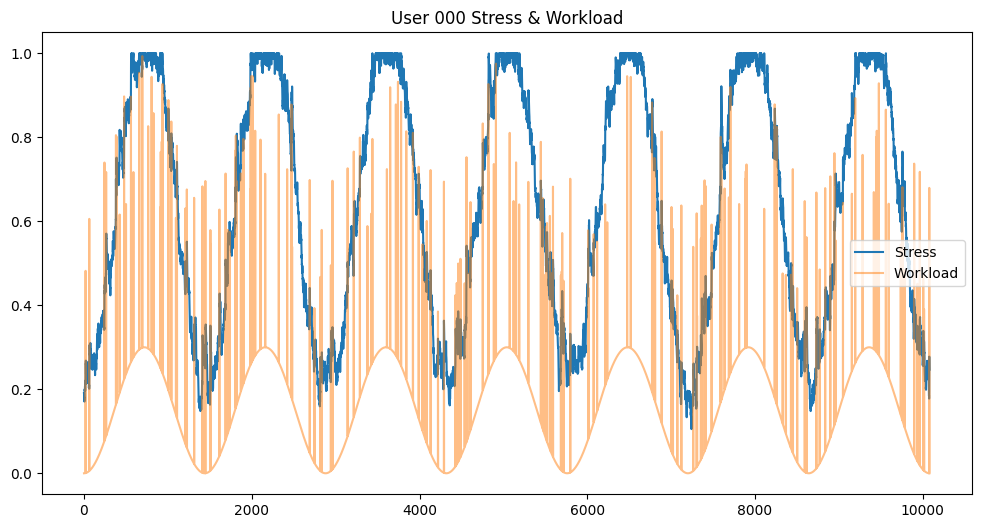

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['stress'], label='Stress')
plt.plot(df['time'], df['workload'], label='Workload', alpha=0.5)
plt.legend()
plt.title('User 000 Stress & Workload')

In [6]:
# Linear Regression Baseline
X = df[['stress', 'workload']].values[:-1]
y = df['stress'].values[1:]

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred):.6f}')

MSE: 0.000182
